In [92]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import VimeoVideo

#read files
df1 = pd.read_csv(r"C:\Users\sneha\Downloads\mexico-real-estate-data1.csv", encoding="latin-1")
df2 = pd.read_csv(r"C:\Users\sneha\Downloads\mexico-real-estate-data2.csv", encoding="latin-1")
df3 = pd.read_csv(r"C:\Users\sneha\Downloads\mexico-real-estate-data3.csv", encoding="latin-1")

#data Cleaning
df1.dropna(inplace=True)
df1.drop(columns=["Unnamed: 0"], inplace=True)
#remove $ from price_usd
df1["price_usd"] = df1["price_usd"].str.replace("$","", regex=False).str.replace(",", "").astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.9+ KB


In [94]:
#current working directory
cwd = os.getcwd()

# Saving the DataFrame to a CSV file in the current working directory
df1.to_csv(os.path.join(cwd, "mexico-real-estate-data1.csv"), index=False)

#df1.to_csv(r"C:\Users\sneha\Downloads\mexico-real-estate-data1.csv", index=False)


In [96]:

df2["price_usd"] =  (df2["price_mxn"] /19).round(2)
df2.drop(columns=["price_mxn"], inplace=True)
df2.drop(columns=["Unnamed: 0"], inplace=True)
df2.dropna(inplace=True)
df2.head()


property_type             state        lat         lon  area_m2  price_usd
0     apartment        Nuevo León  25.721081 -100.345581       72   68421.05
2         house           Morelos  23.634501 -102.552788      360  278947.37
6     apartment  Estado de México  19.272040  -99.572013       85   65789.47
7         house   San Luis Potosí  22.138882 -100.996510      158  111578.95
8     apartment  Distrito Federal  19.394558  -99.129707       65   39904.74

In [98]:
df2.to_csv(os.path.join(cwd, "mexico-real-estate-data2.csv"), index=False)

In [100]:
# Create "state" column for df3
df3["place_with_parent_names"].str.split("|",expand=True).head()

df3[["lat", "lon" ]] = df3["lat-lon"].str.split(",", expand=True)
df3["state"] = df3["place_with_parent_names"].str.split("|",expand=True)[2]

# Drop "place_with_parent_names" and "lat-lon" from df3
df3.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)

df3.dropna(inplace=True)
df3.drop(columns=["Unnamed: 0"], inplace=True)

# Print object type, shape, and head
df3.head()

property_type  area_m2  price_usd         lat          lon  \
0     apartment       71   48550.59    19.52589   -99.151703   
1         house      233  168636.73  19.2640539  -99.5727534   
2         house      300   86932.69   19.268629   -99.671722   
4     apartment       84   68508.67   19.511938   -96.871956   
5         house      175  102763.00   20.689157  -103.366728   

                             state  
0                 Distrito Federal  
1                 Estado de México  
2                 Estado de México  
4  Veracruz de Ignacio de la Llave  
5                          Jalisco

In [102]:
df3.to_csv(os.path.join(cwd, "mexico-real-estate-data3.csv"), index=False)

In [104]:
print("df1 shape", df1.shape)
print("df2 shape", df2.shape)
print("df3 shape", df3.shape)

df1 shape (583, 6)
df2 shape (571, 6)
df3 shape (582, 6)


In [106]:
# Concatenate df1, df2, and df3
df = pd.concat([df1, df2, df3])

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
5         house           Yucatán  21.052583  -89.538639      205  105191.37

In [108]:
# Save df
df = df.head()
df.to_csv(os.path.join(cwd, "mexico-real-estate-data.csv"), index=False)
#df.head()

In [110]:
df.shape

(5, 6)

In [114]:
df01 = pd.read_csv("mexico-real-estate-data1.csv")
df02 = pd.read_csv("mexico-real-estate-data2.csv")
df03 = pd.read_csv("mexico-real-estate-data3.csv")

In [116]:
print(df01.shape)
print(df02.shape)
print(df03.shape)

(583, 6)
(571, 6)
(582, 6)


In [118]:
df0 = pd.concat([df01, df02, df03])
df0.head()
df0.shape

(1736, 6)

In [122]:
df0.to_csv("mexico-real-estate-data.csv", index=False)

In [124]:
df0.shape

(1736, 6)

In [126]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 0 to 581
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.9+ KB


In [132]:
df = pd.read_csv("mexico-real-estate-data.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
4         house           Yucatán  21.052583  -89.538639      205  105191.37

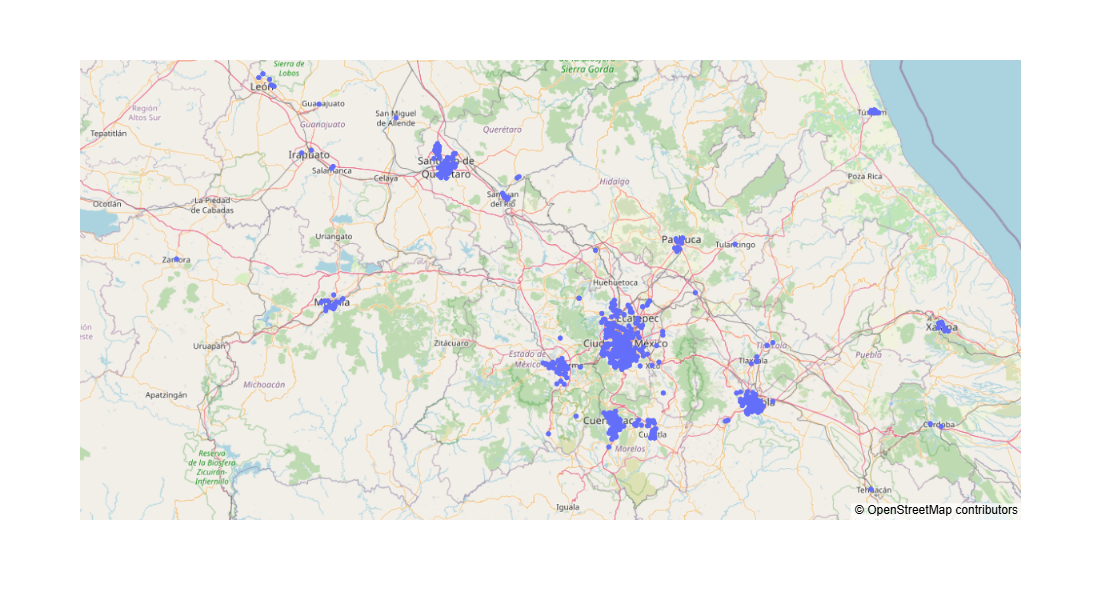

In [134]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= "lat",
    lon= "lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [136]:
# Get value counts of "state" column
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

In [138]:
df[[ "area_m2", "price_usd"]].describe()

area_m2      price_usd
count  1736.000000    1736.000000
mean    170.261521  115331.980766
std      80.594539   65426.173873
min      60.000000   33157.890000
25%     101.750000   65789.470000
50%     156.000000   99262.130000
75%     220.000000  150846.665000
max     385.000000  326733.660000

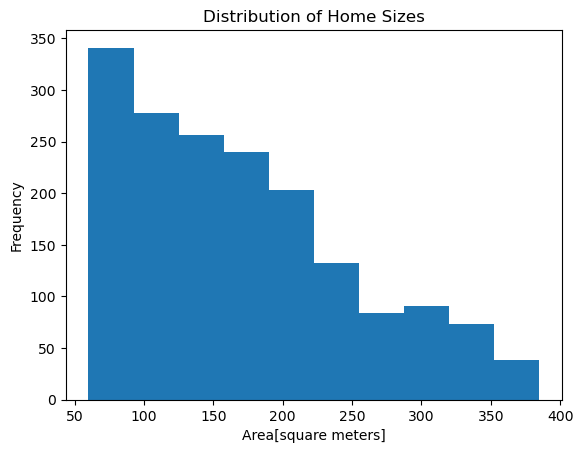

In [140]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"])

# Add x-axis label

plt.xlabel("Area[square meters]")
# Add y-axis label

plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes");

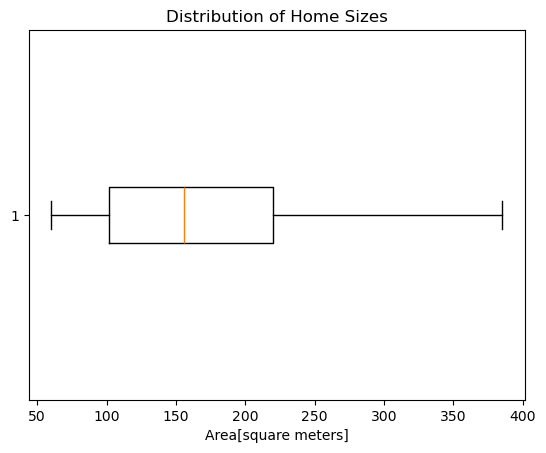

In [142]:
# Use Matplotlib to create boxplot of "area_m2"

plt.boxplot(df["area_m2"], vert=False)
# Add x-axis label

plt.xlabel("Area[square meters]")
# Add title
plt.title("Distribution of Home Sizes");

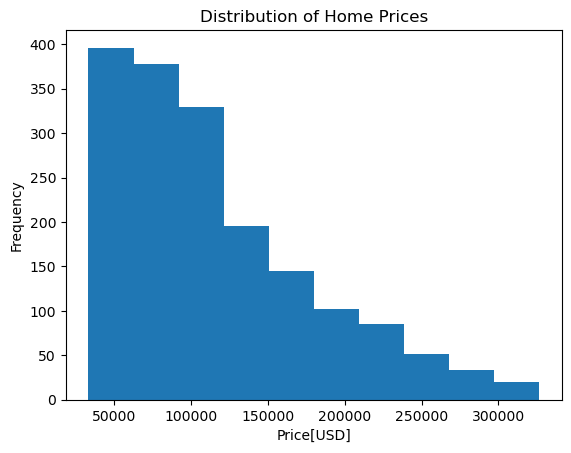

In [144]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])

# Add x-axis label
plt.xlabel("Price[USD]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

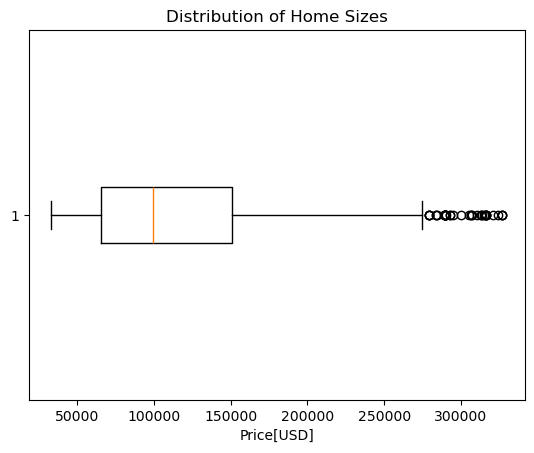

In [146]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)

# Add x-label axis
plt.xlabel("Price[USD]")

# Add y-label axis
plt.title("Distribution of Home Sizes");

In [150]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("mexico-real-estate-data.csv")

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
4         house           Yucatán  21.052583  -89.538639      205  105191.37

In [152]:
# Declare variable `mean_price_by_state`
df_state_group = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state = df_state_group

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro           133955.913281
Guanajuato          133277.965833
Nuevo León          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

<Axes: title={'center': 'Mean House Price by State'}, xlabel='State', ylabel='Mean Price [USD]'>

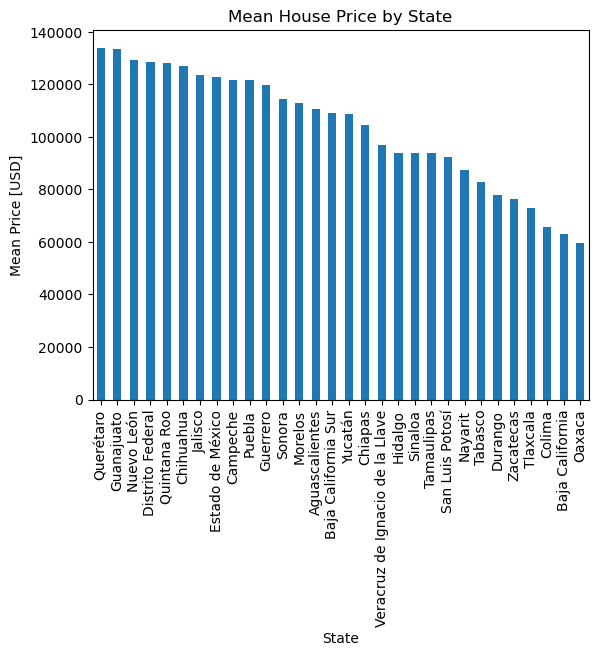

In [154]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean Price [USD]",
    title="Mean House Price by State"
)
#plt.bar(x=mean_price_by_state.index, height=mean_price_by_state.values)
#plt.xlabel("state")
#plt.ylabel("Mean Price [USD]");

In [156]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


property_type             state        lat         lon  area_m2  price_usd  \
0         house  Estado de México  19.560181  -99.233528      150   67965.56   
1         house        Nuevo León  25.688436 -100.198807      186   63223.78   
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37   
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80   
4         house           Yucatán  21.052583  -89.538639      205  105191.37   

   price_per_m2  
0    453.103733  
1    339.912796  
2   1028.028902  
3    628.725333  
4    513.128634

<Axes: title={'center': 'Mean House Price per M^2 by State'}, xlabel='State', ylabel='Mean Price per M^2[USD]'>

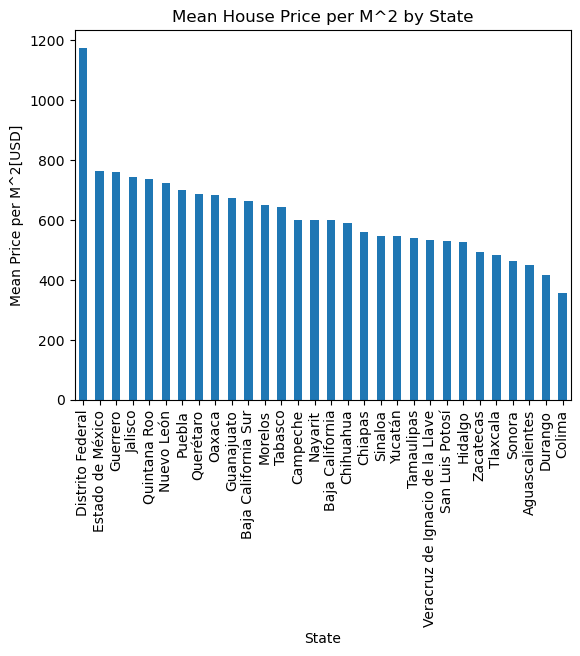

In [158]:
# Group `df` by "state", create bar chart of "price_per_m2"
(df
 .groupby("state")
 ["price_per_m2"].mean()
 .sort_values(ascending=False)
 .plot(kind="bar",
       xlabel="State",
       ylabel="Mean Price per M^2[USD]",
       title="Mean House Price per M^2 by State"
     )
)

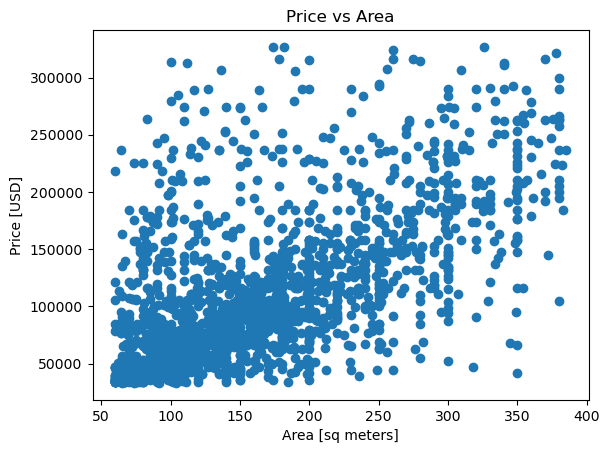

In [160]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"], y=df["price_usd"])

# Add x-axis label

plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Price vs Area");

In [163]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.5855182453232063


In [165]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"]=="Morelos"]

# Print object type, shape, and
print("df_morelos shape:", df_morelos.shape)

df_morelos.head()

df_morelos shape: (160, 7)


property_type    state        lat        lon  area_m2  price_usd  \
6          house  Morelos  18.812605 -98.954826      281  151509.56   
9          house  Morelos  18.804197 -98.932816      117   63223.78   
18         house  Morelos  18.855343 -99.241142       73   36775.16   
49         house  Morelos  18.804197 -98.932816      130   65858.10   
55         house  Morelos  18.960244 -99.212962      305  227351.46   

    price_per_m2  
6     539.179929  
9     540.374188  
18    503.769315  
49    506.600769  
55    745.414623

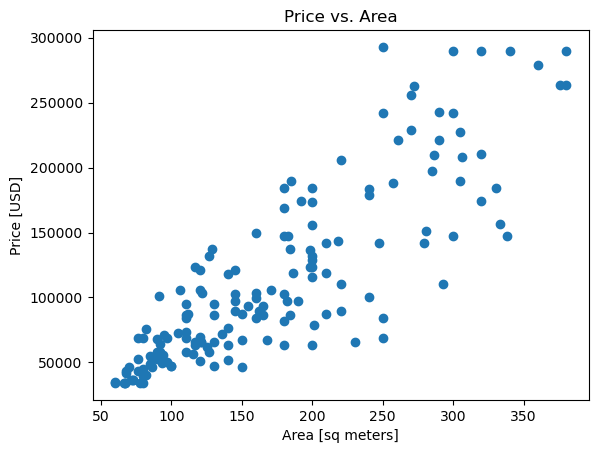

In [167]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Price vs. Area");

In [169]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713708


df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392130717864


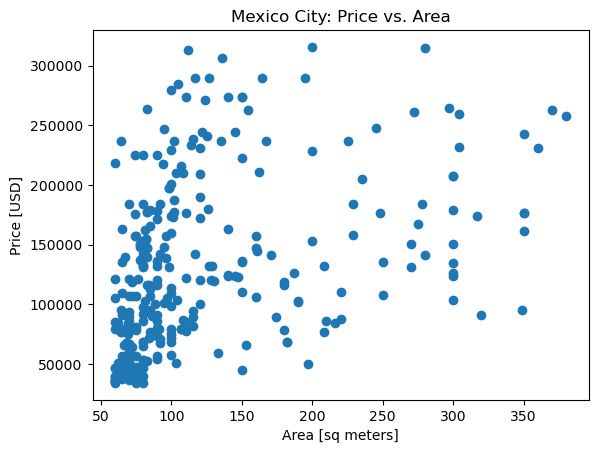

In [171]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"]=="Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  # REMOVERHS

# Add x-axis label
plt.xlabel("Area [sq meters]")  # REMOVERHS

# Add y-axis label
plt.ylabel("Price [USD]")  # REMOVERHS

# Add title
plt.title("Mexico City: Price vs. Area")  # REMOVERHS

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)